# Usage example for lmdiag
Source: https://github.com/dynobo/lmdiag

### Imports & Generate Linear Regression Model for Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import lmdiag

%matplotlib inline

np.random.seed(20)
predictor = np.random.normal(size=30, loc=20, scale=3)
response = 5 + 5 * predictor + np.random.normal(size=30)
X = sm.add_constant(predictor)
lm = sm.OLS(response, X).fit()

/home/holger/.local/share/virtualenvs/lmdiag-tiXVVyhp/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Print all the Plots as Matrix 
(You might want to set size beforehand, otherwise it's really tiny)

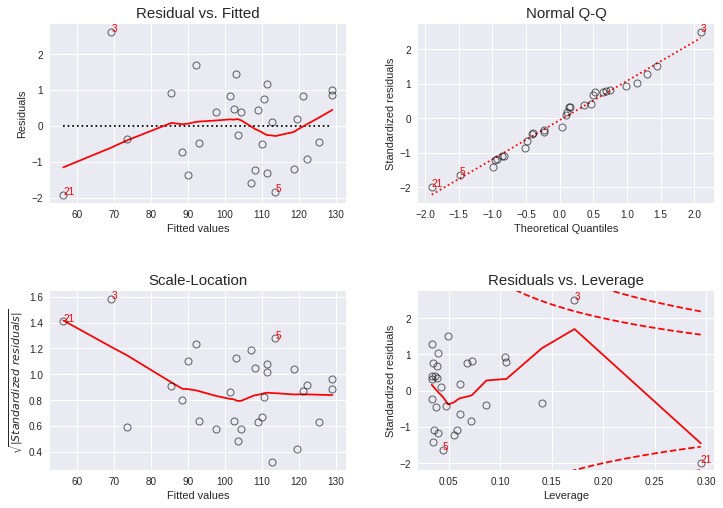

In [2]:
plt.style.use('seaborn')
plt.figure(figsize=(10,7))
lmdiag.plot(lm);

### Plot the charts individually

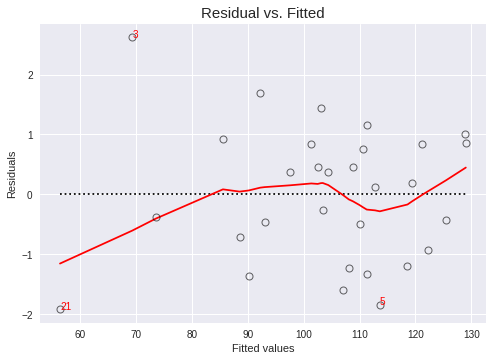

In [3]:
lmdiag.resid_fit(lm);

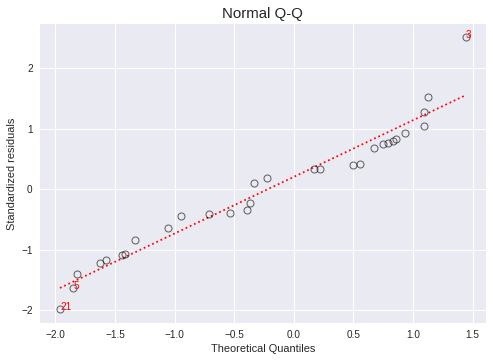

In [4]:
lmdiag.q_q(lm);

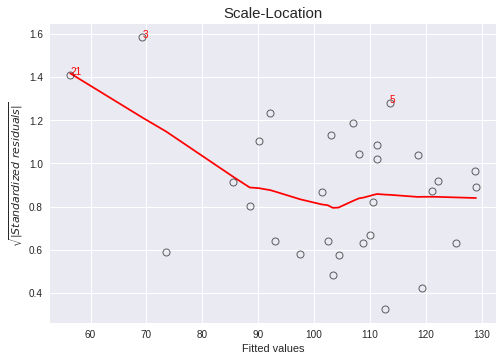

In [5]:
lmdiag.scale_loc(lm);

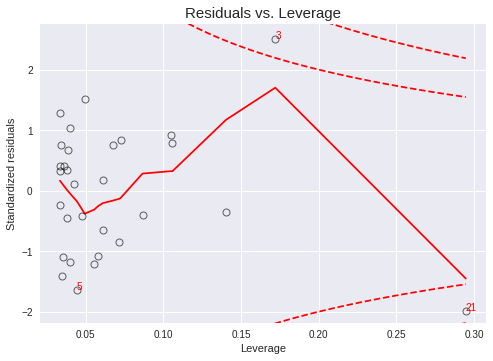

In [6]:
lmdiag.resid_lev(lm);

### Print useful descriptions for interpretation

**For all available charts:**

In [7]:
lmdiag.info()

        Name: Residuals vs. Fitted
      Method: lmdiag.resid_fit(lm)
      x-Axis: Fitted Values (The dependent variable of your model; What you
              threw in statsmodels OLS as 1st parameter)
      y-Axis: Residuals (The "error" of the model; Distance to the fitted
              regression line)
 Description: It's purpose is to identify non-linear patterns in the residuals.
              If you see a horizontal red line and the points spread around it
              without a recognizable pattern, chances are good, that there is
              no non-linear relationship in the data. If you can see clear
              pattern or a curve, a linear model might not be the best
              choice.The red labels show the indices of three observations with
              the highest absolute residuals.

        Name: Normal Q-Q
      Method: lmdiag.q_q(lm)
      x-Axis: Theoretical Quantiles (Quantiles from the Normal Distribution)
      y-Axis: Standardized residuals (Quantiles of 

**Or for individual chart:**

In [8]:
lmdiag.info('resid_fit')

# Some with other charts:
# lmdiag.info('q_q')
# lmdiag.info('scale_loc')
# lmdiag.info('resid_lev')

        Name: Residuals vs. Fitted
      Method: lmdiag.resid_fit(lm)
      x-Axis: Fitted Values (The dependent variable of your model; What you
              threw in statsmodels OLS as 1st parameter)
      y-Axis: Residuals (The "error" of the model; Distance to the fitted
              regression line)
 Description: It's purpose is to identify non-linear patterns in the residuals.
              If you see a horizontal red line and the points spread around it
              without a recognizable pattern, chances are good, that there is
              no non-linear relationship in the data. If you can see clear
              pattern or a curve, a linear model might not be the best
              choice.The red labels show the indices of three observations with
              the highest absolute residuals.

